In [1]:
#Library import 
!pip3 install gdown
import optuna
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 
np.random.RandomState(seed=42)
!gdown --id 1lUZssANz3BVri3pef2Hxz1XAnlvushrA

/opt/conda/lib/python3.7/site-packages/gdown/cli.py:130: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From (uriginal): https://drive.google.com/uc?id=1lUZssANz3BVri3pef2Hxz1XAnlvushrA
From (redirected): https://drive.google.com/uc?id=1lUZssANz3BVri3pef2Hxz1XAnlvushrA&confirm=t&uuid=05326b4c-547c-4d72-ad9e-6f9341ef43c2
To: /kaggle/working/dataset.npy
100%|███████████████████████████████████████| 1.79G/1.79G [00:15<00:00, 116MB/s]


In [2]:

# Load dataset
data = np.load('/kaggle/working/dataset.npy', allow_pickle = True)
data.shape

(11446, 2)

In [3]:
X=[]#features 
Y=[]#target
for x in range(data.shape[0]):
    if data[x][1]==1 or data[x][1]==2 or data[x][1]==3:
        X.append(data[x][0])
        Y.append(data[x][1])
#Creating target variable as sparse 
from sklearn.preprocessing import OneHotEncoder
y=np.array(Y).reshape(-1,1)
encoder = OneHotEncoder()
encoder.fit(y)
y_encoded = encoder.transform(y).toarray()

In [4]:

#splitting the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(np.array(X),y_encoded,test_size=0.2,random_state=42)
#normalizing the pixel values 
x_train=x_train/255.0
x_test=x_test/255.0


CNN Model Based Classification

In [5]:
model = Sequential()
model.add(Conv2D(
                filters=50,
                kernel_size=3,
                padding="same",
                activation="relu",
                input_shape=(228, 228, 3)
            ))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.4))
model.add(Conv2D(
                filters=50,
                kernel_size=3,
                padding="same",
                activation="relu"
                ))
model.add(Conv2D(
                filters=50,
                kernel_size=3,
                padding="same",
                activation="relu"
                ))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.4))
model.add(Flatten())
model.add(Dense(units=1024,activation="relu"))
model.add(Dense(units=512,activation="relu"))
model.add(Dense(units=256,activation="relu"))
model.add(Dropout(rate=0.51))
model.add(Dense(units=3, activation="softmax"))
model.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

In [6]:
history=model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=0)

2023-04-07 09:44:39.729887: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


Model Evaluation

In [7]:
eval=model.evaluate(x_test,y_test)
print("Accuracy of the model is : ",eval[1]*100)
print("Loss of the model is : ",eval[0]*100)

10/10 [==============================] - 1s 50ms/step - loss: 0.8477 - accuracy: 0.5738
Accuracy of the model is :  57.3825478553772
Loss of the model is :  84.76713299751282


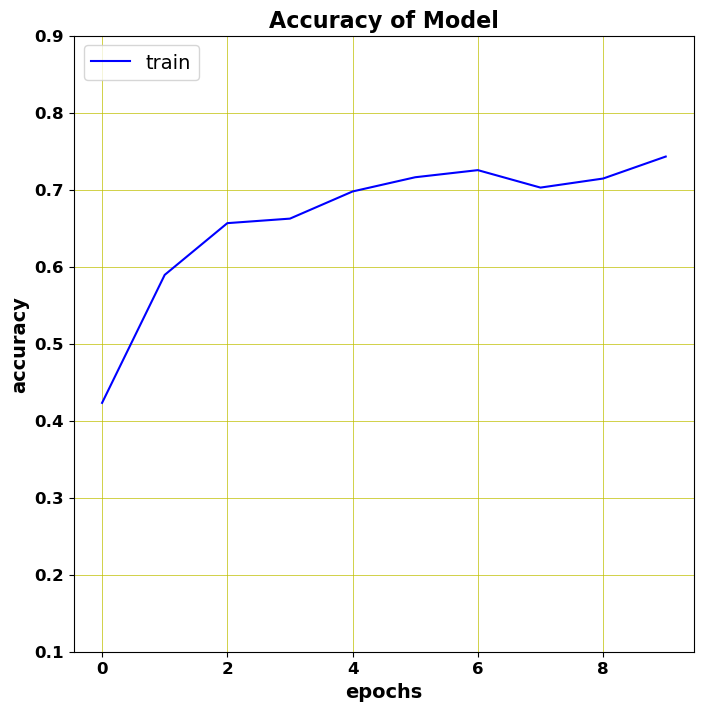

In [8]:
import matplotlib.pyplot as plt 
%matplotlib inline
plt.figure(figsize=(8, 8))
plt.plot(history.history['accuracy'], color='b')
plt.title('Accuracy of Model', weight='bold', fontsize=16)
plt.ylabel('accuracy', weight='bold', fontsize=14)
plt.xlabel('epochs', weight='bold', fontsize=14)
plt.ylim(0.1, 0.9)
plt.xticks(weight='bold', fontsize=12)
plt.yticks(weight='bold', fontsize=12)
plt.legend(['train'], loc='upper left', prop={'size': 14})
plt.grid(color = 'y', linewidth='0.5')
plt.show()

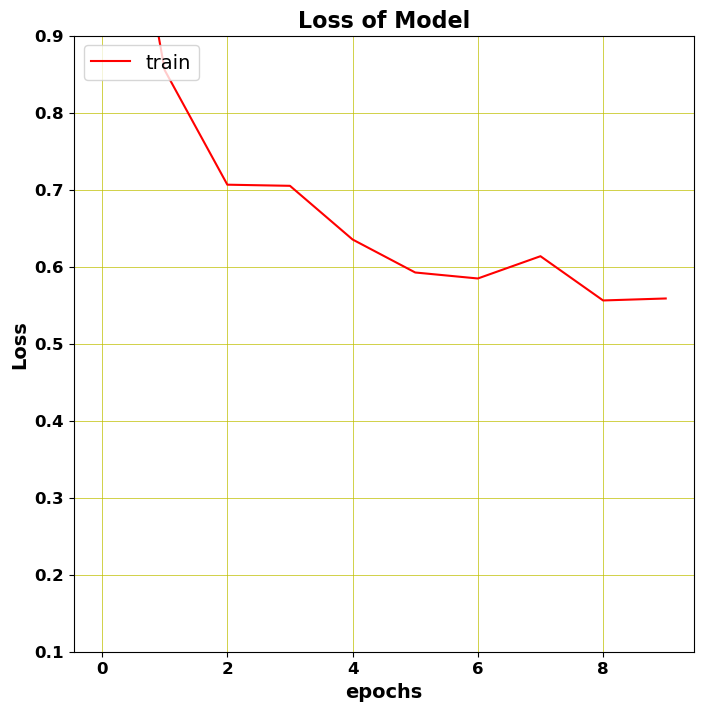

In [9]:
import matplotlib.pyplot as plt 
%matplotlib inline
plt.figure(figsize=(8, 8))
plt.plot(history.history['loss'], color='r')
plt.title('Loss of Model', weight='bold', fontsize=16)
plt.ylabel('Loss', weight='bold', fontsize=14)
plt.xlabel('epochs', weight='bold', fontsize=14)
plt.ylim(0.1, 0.9)
plt.xticks(weight='bold', fontsize=12)
plt.yticks(weight='bold', fontsize=12)
plt.legend(['train'], loc='upper left', prop={'size': 14})
plt.grid(color = 'y', linewidth='0.5')
plt.show()

**Feature Extraction**

In [11]:
x_train_features = model.predict(x_train)
x_test_features = model.predict(x_test)

# Flatten features
x_train_features = x_train_features.reshape(x_train.shape[0], -1)
x_test_features = x_test_features.reshape(x_test.shape[0], -1)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
clf=KNeighborsClassifier(n_neighbors=20)
clf.fit(x_train_features, y_train)
y_pred = clf.predict(x_test_features)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")

10/10 [==============================] - 0s 24ms/step
Accuracy: 69.79865771812081


In [15]:
#confusion matrix and classification report
from sklearn.metrics import classification_report

cr=classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.65      0.59      0.62        76
           1       0.71      0.45      0.55        80
           2       0.91      0.89      0.90       142

   micro avg       0.80      0.70      0.75       298
   macro avg       0.76      0.65      0.69       298
weighted avg       0.79      0.70      0.74       298
 samples avg       0.70      0.70      0.70       298



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
cm

array([[ 56,  13,   7],
       [ 38,  36,   6],
       [ 13,   2, 127]])

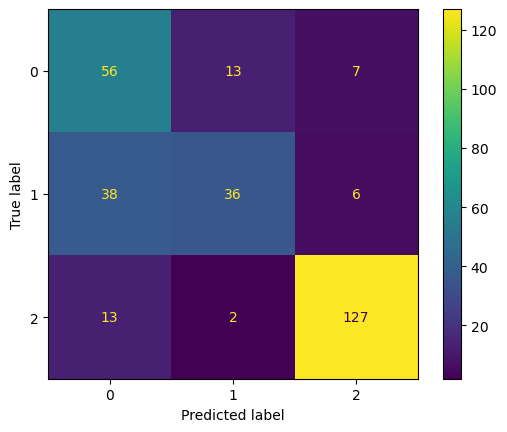

In [27]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()